In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# 1) Chargement du Dataset

In [26]:
# charger le dataset
data  = pd.read_csv("data/diamonds.csv")
data = data.drop(data.columns[0], axis=1)
target_variable = ['price','carat']

numeric_features = ['depth', 'table', 'x', 'y', 'z']

categorical_features = ['cut', 'color', 'clarity']

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [29]:
for col in categorical_features:
    print(f"\nVariable: {col}")
    print(f"Nombre de valeurs uniques: {data[col].nunique()}")
    print(f"Mode: {data[col].mode()[0]}")
    print(f"valeurs:\n{data[col].value_counts().head()}")


Variable: cut
Nombre de valeurs uniques: 5
Mode: Ideal
valeurs:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Variable: color
Nombre de valeurs uniques: 7
Mode: G
valeurs:
color
G    11292
E     9797
F     9542
H     8304
D     6775
Name: count, dtype: int64

Variable: clarity
Nombre de valeurs uniques: 8
Mode: SI1
valeurs:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
Name: count, dtype: int64


# 2) Qualité du Dataset

Nombre de valeurs manquante par variable

In [30]:
print(data.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


Valeurs doublons

In [31]:
print(data.duplicated().sum())

146


Détéction des outliers

In [32]:
def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])

for col in numeric_features + [target_variable]:
    n = count_outliers(data, col)
    print(f"{col}: {n} outliers potentiels")

depth: 2545 outliers potentiels
table: 605 outliers potentiels
x: 32 outliers potentiels
y: 29 outliers potentiels
z: 49 outliers potentiels
['price', 'carat']: 53940 outliers potentiels


# 3) Analyse Univariée

Histogrammes et Boxplots pour les variable numérique

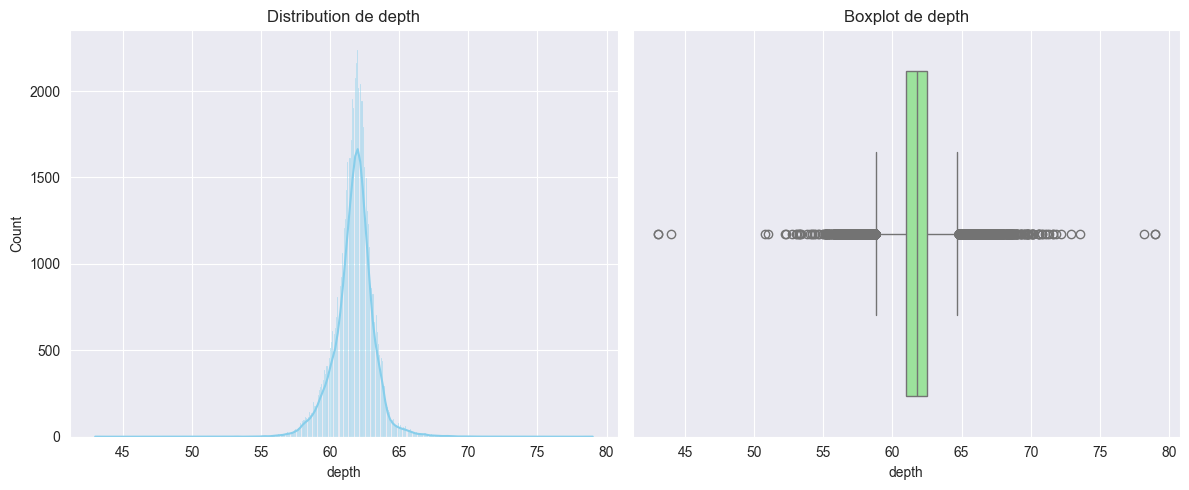

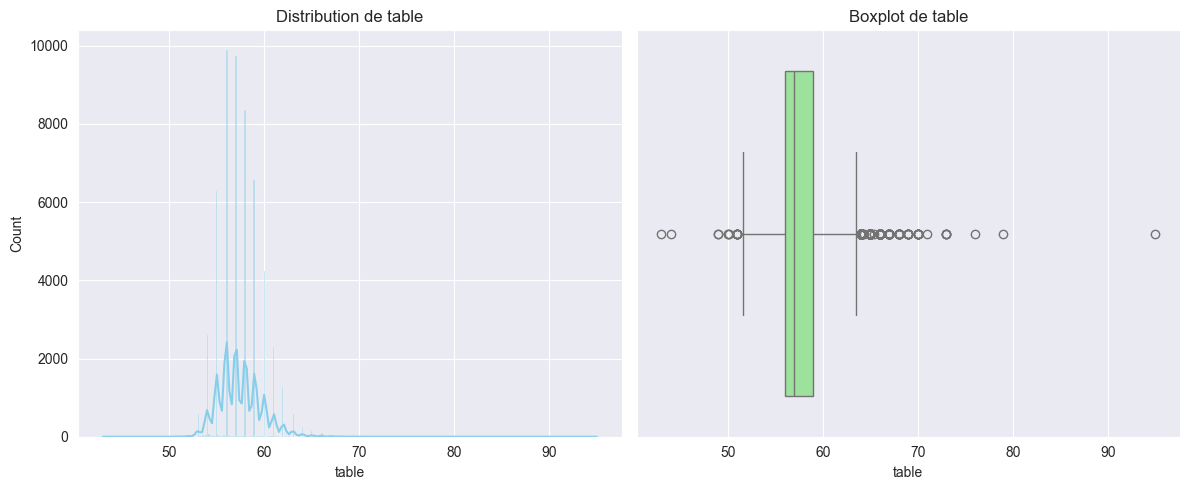

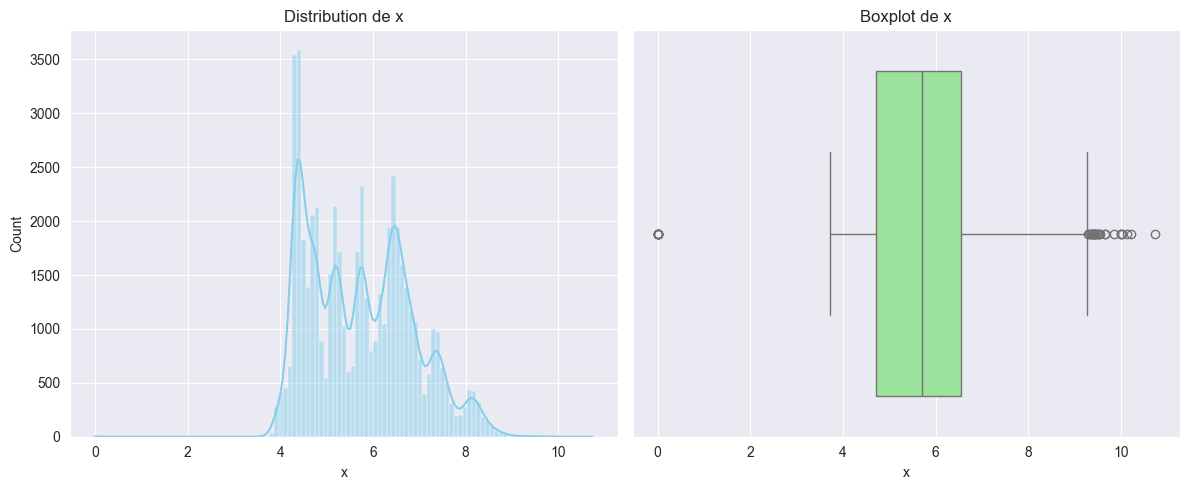

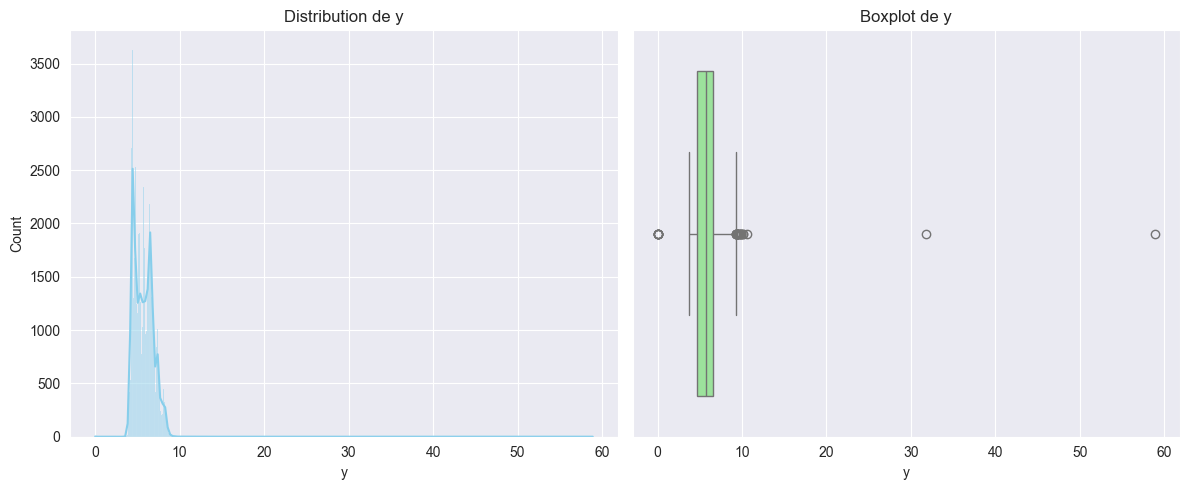

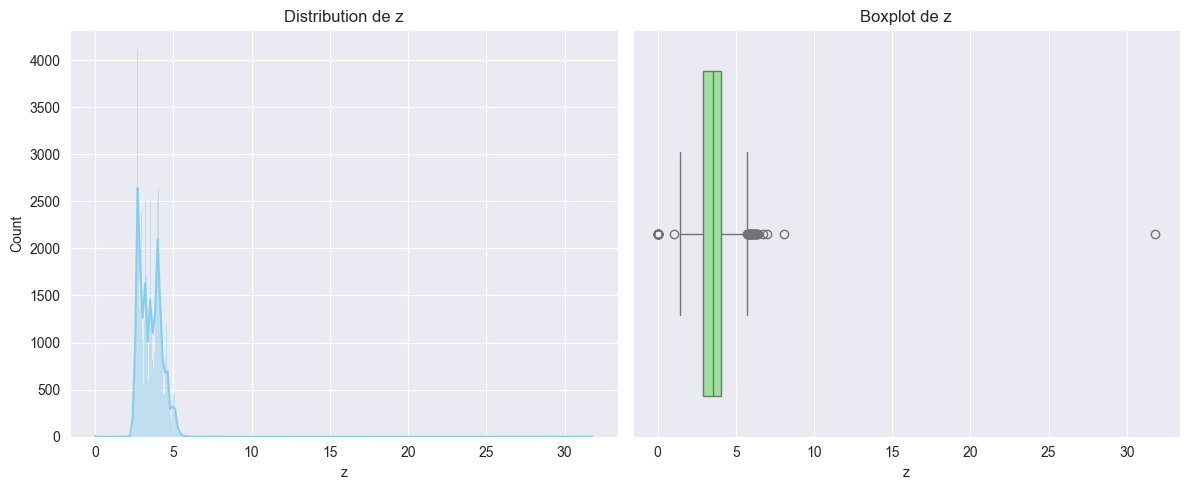

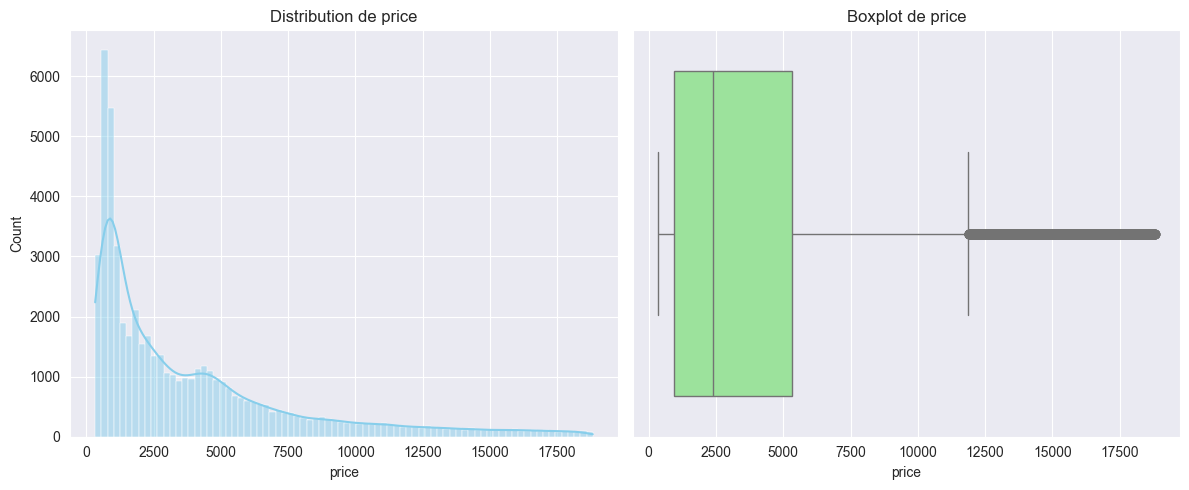

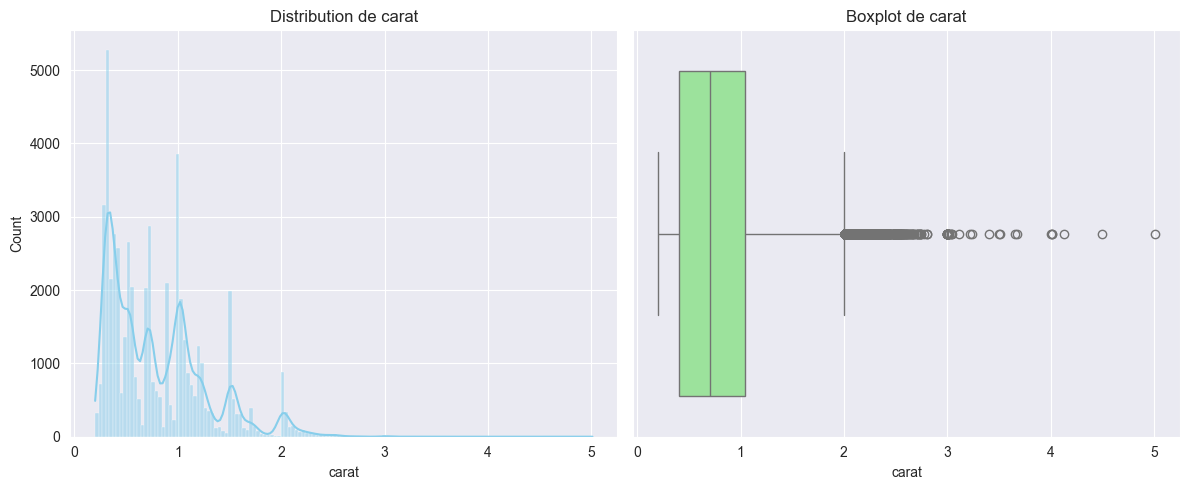

In [35]:
for col in numeric_features + target_variable:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogramme
    sns.histplot(data[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution de {col}')

    # Boxplot
    sns.boxplot(x=data[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

Diagramme pour les variable catégorielle

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13280\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


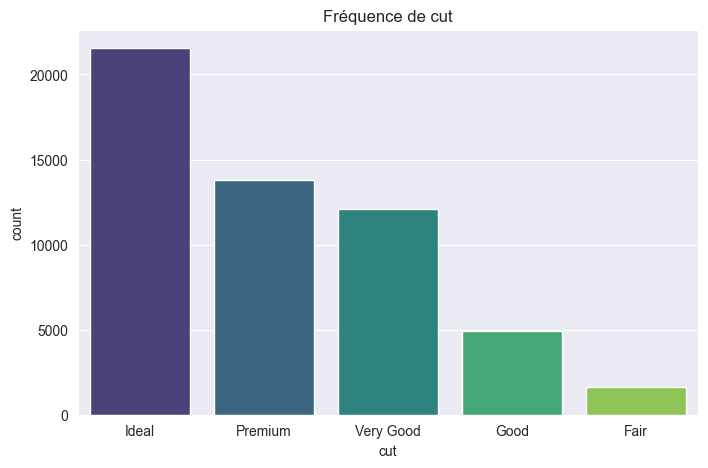

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13280\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


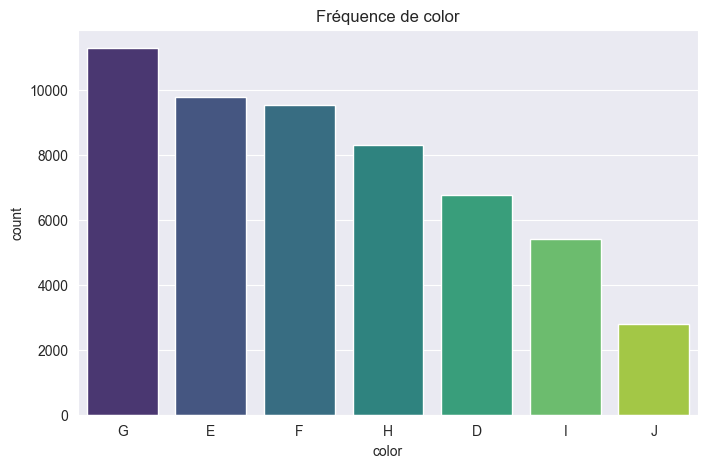

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13280\925950267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, palette='viridis')


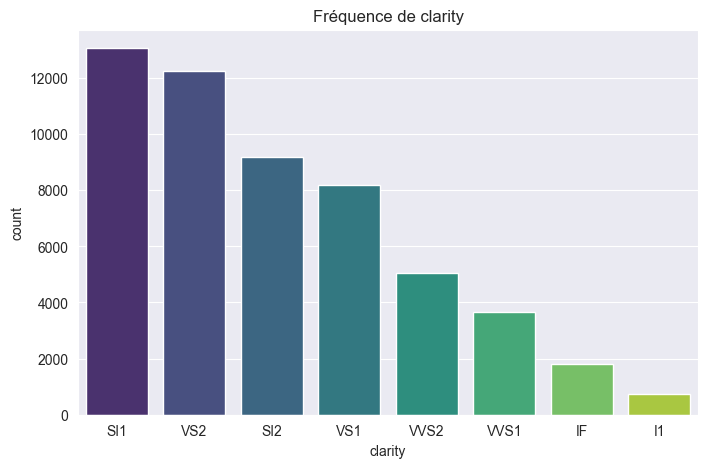

In [36]:
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    order = data[col].value_counts().index
    sns.countplot(x=col, data=data, order=order, palette='viridis')
    plt.title(f'Fréquence de {col}')
    plt.show()

# 5) Analyse Bivariée


Boxplot des feature numérique comparée avec le prix

In [ ]:
for col in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable[0], data=data, palette='coolwarm')
    plt.title(f'Distribution du {target_variable} par {col}')
    plt.show()

Boxplot des feature numérique comparée avec le nombre de carat

In [ ]:
for col in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable[1], data=data, palette='coolwarm')
    plt.title(f'Distribution du {target_variable} par {col}')
    plt.show()

Boxplot des feature catégorielle comparée avec le prix

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13280\3248947714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target_variable[0], data=data, palette='coolwarm')


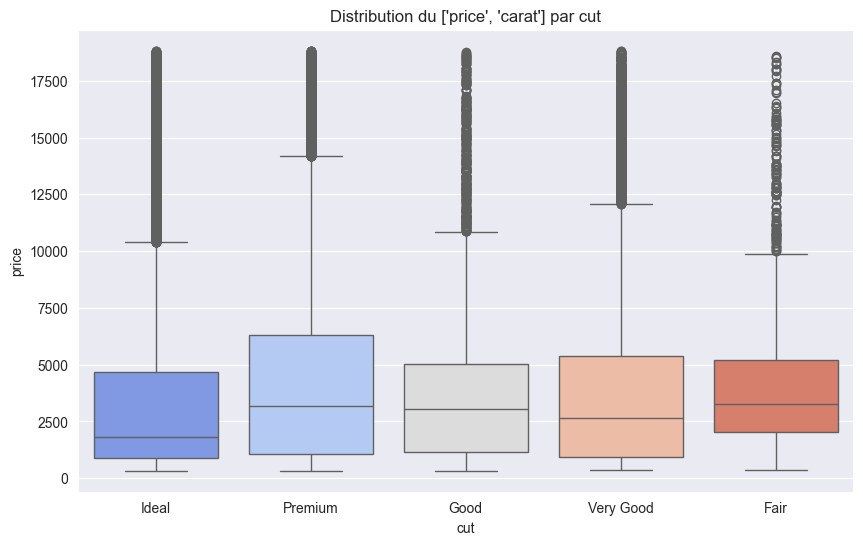

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13280\3248947714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target_variable[0], data=data, palette='coolwarm')


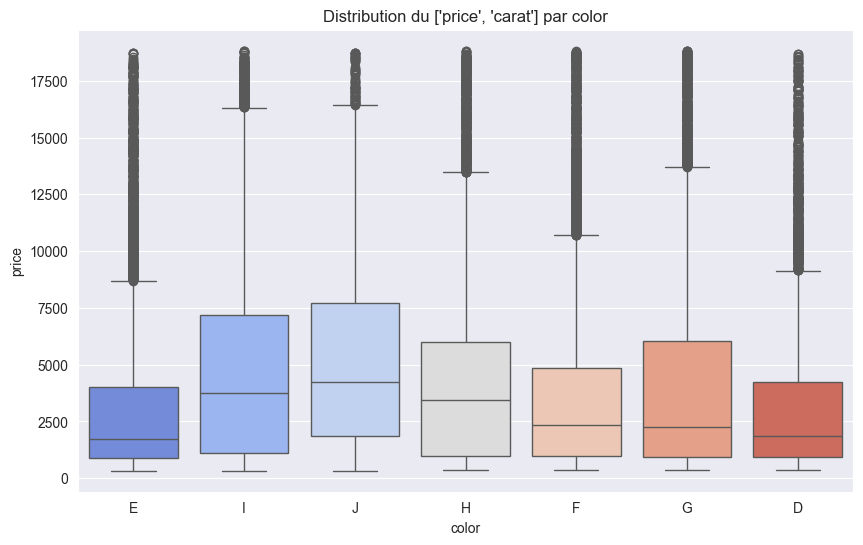

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13280\3248947714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target_variable[0], data=data, palette='coolwarm')


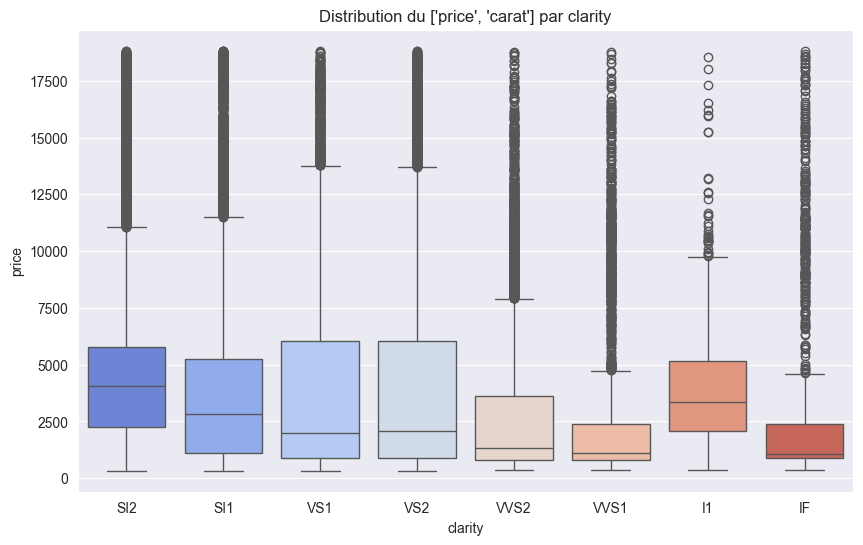

In [55]:
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable[0], data=data, palette='coolwarm')
    plt.title(f'Distribution du {target_variable} par {col}')
    plt.show()

Boxplot des feature catégorielle comparée avec le nombre de carat

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable[1], data=data, palette='coolwarm')
    plt.title(f'Distribution du {target_variable} par {col}')
    plt.show()

Matrice de corrélation

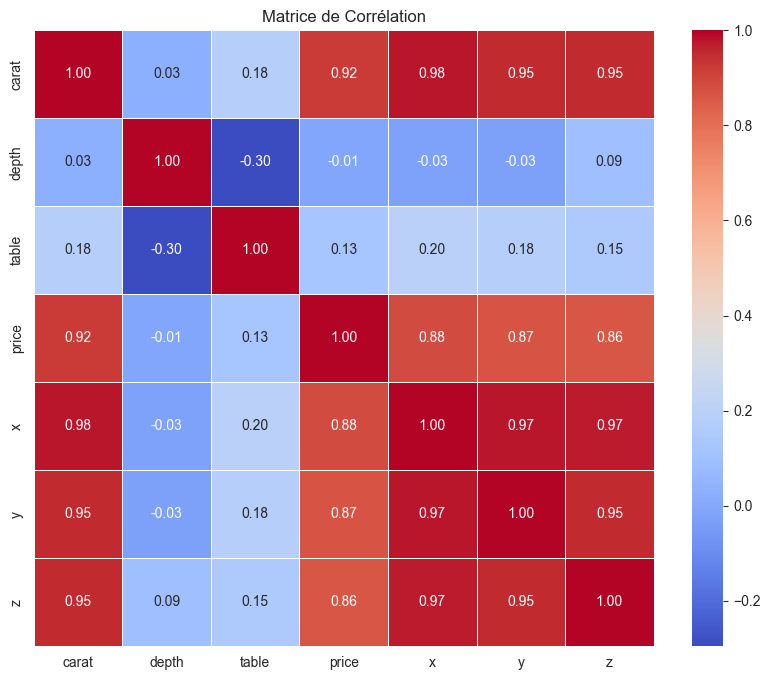

In [51]:
plt.figure(figsize=(10, 8))
numeric_df = data.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

Pair Plot

Génération du Pair Plot (échantillon de 1000 points)...


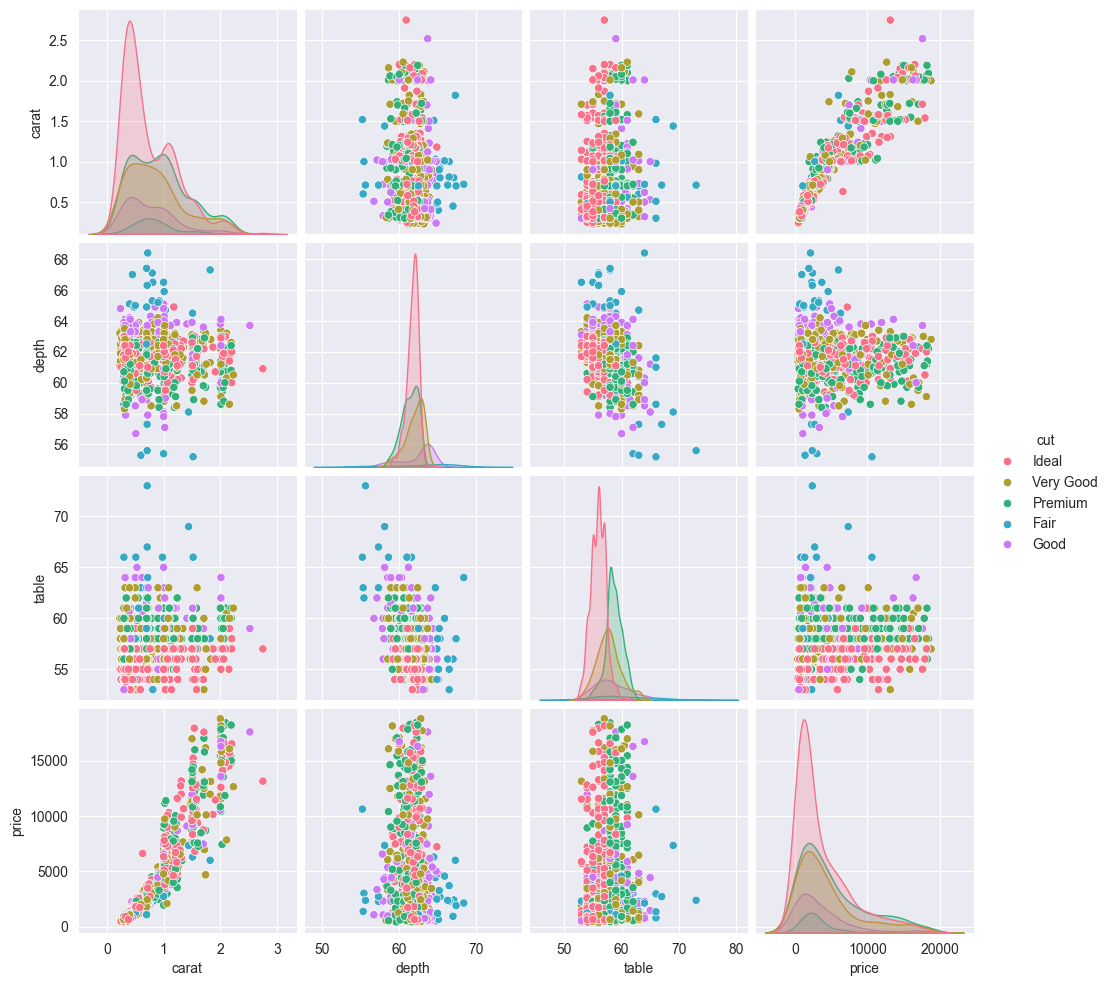

In [52]:
print("Génération du Pair Plot (échantillon de 1000 points)...")
sample_df = data.sample(1000, random_state=42)
sns.pairplot(sample_df[['carat', 'depth', 'table', 'price', 'cut']], hue='cut', palette='husl')
plt.show()

# 5) Principal Component Analysis

standardisation des données

In [19]:
from sklearn.preprocessing import StandardScaler

# Separate target and feature
target_col = ['carat', 'price']
X = data.drop(columns=target_col)
y = data[target_col]

# Identify numeric columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize and fit the scaler
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Recombine standardized features with target
df_standardized = pd.concat([X, y], axis=1)

# Check result
df_standardized.head()

,cut,color,clarity,depth,table,x,y,z,carat,price
0,Ideal,E,SI2,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,0.23,326
1,Premium,E,SI1,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0.21,326
2,Good,E,VS1,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,0.23,327
3,Premium,I,VS2,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0.29,334
4,Good,J,SI2,1.082358,0.242928,-1.240167,-1.212238,-1.117674,0.31,335


Application du PCA

In [23]:
from sklearn.decomposition import PCA

# --- Apply PCA ---
pca = PCA()   # You can specify n_components later if you want to limit them
X_pca = pca.fit_transform(X[num_cols])

# Convert PCA output to a DataFrame
pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)
df_pca[target_col] = y.values

# --- Explained variance ---
explained_variance = pca.explained_variance_ratio_

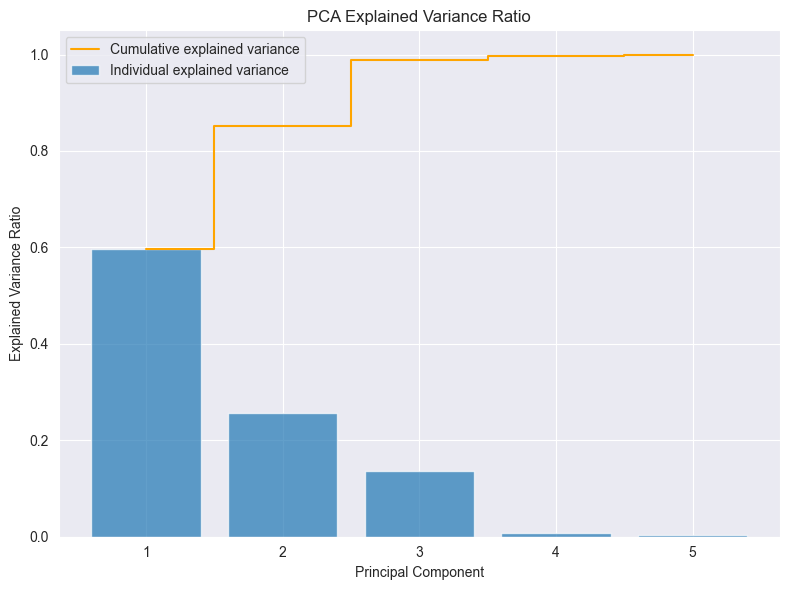

In [24]:
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cum_explained_variance)+1), cum_explained_variance, where='mid',
         label='Cumulative explained variance', color='orange')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [25]:
feature_names = X.columns

n_show = min(5, pca.n_components_)
# shape: (n_features, n_show)
corr_matrix = (pca.components_[:n_show, :].T *
               np.sqrt(pca.explained_variance_[:n_show]))

corr_df = pd.DataFrame(
    corr_matrix,
    index=feature_names,
    columns=[f'PC{i+1}' for i in range(n_show)]
)

corr_df.round(3)

ValueError: Shape of passed values is (5, 5), indices imply (8, 5)